<a href="https://colab.research.google.com/github/JunHyeong-data/ML-DL-Study/blob/main/Basic-Deep-Learning/10_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88_%2C_%EC%96%BC%EB%A6%AC_%EC%8A%A4%ED%83%91%2C_%EC%A1%B0%EA%B8%B0%EB%A9%88%EC%B6%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Early Stopping (얼리 스탑핑)

## 1. 배경: Overfitting과 Regularization

이전 시간에는 **Overfitting 현상**과 이를 완화하기 위한 **Regularization** 기법들에 대해 살펴보았다.  
대표적인 Regularization 방법으로는 다음과 같은 것들이 있다.

- Dropout
- Batch 관련 기법
- Normalization
- 데이터 증강 (Data Augmentation)

그리고 **가장 강력한 Regularization 방법은 충분한 데이터를 확보하는 것**이라는 점도 함께 언급했다.

이러한 방법들 중, 데이터 확보만큼이나 **실제로 매우 practical하게 중요한 Regularization 기법**이 바로 **Early Stopping**이다.

---

## 2. Early Stopping 개념

Early Stopping은 말 그대로 **학습을 끝까지 진행하지 않고, 중간에 멈추는 기법**이다.  
훈련 도중 **Validation 성능이 더 이상 좋아지지 않으면 학습을 종료**하고,  
그 시점까지 학습된 모델을 최종 모델로 사용한다.

---

## 3. 실험 설정

- 데이터: 회오리(spiral) 형태의 데이터
- 데이터 분할: Training / Validation
- 모델 구조
  - Input dimension
  - Hidden dimension = 16
  - Hidden layers = 3
  - Dropout layer = 2개
- Loss function: Binary Cross Entropy
- Optimizer: Stochastic Gradient Descent (SGD)

기존 코드에서는 input size, hidden size, output size가 global variable로 선언되어 있었지만,  
이를 **Neural Network의 Constructor에서 전달받도록 수정**하여 더 재사용 가능한 구조로 변경했다.

---

## 4. Training Loss vs Validation Loss 관찰

학습을 진행하면서 다음 현상을 확인할 수 있다.

- **Training loss**: 지속적으로 감소
- **Validation loss**:
  - 약 0.25까지 감소
  - 이후 다시 증가

이를 더 명확히 보기 위해:

- Training loss 리스트
- Validation loss 리스트

를 각각 저장한 뒤, 그래프로 시각화했다.

---

## 5. Overfitting 발생 시점

그래프를 통해 다음을 확인할 수 있다.

- Training loss는 계속 감소
- Validation loss는 약 **0.2까지 감소 후 다시 증가**
- 약 **1000 step 이후부터 Overfitting이 시작**
- **2500 step 부근에서 Validation loss가 최소**

즉, 이 경우에는 **2500번째 step에서 학습을 멈추는 것이 가장 이상적**이다.

---

## 6. Early Stopping 기본 구현 아이디어

Early Stopping의 핵심 로직은 매우 단순하다.

1. 현재까지의 **minimum validation loss**를 저장
2. 현재 validation loss가 더 작다면:
   - minimum validation loss 갱신
   - 해당 시점의 모델 저장
3. validation loss가 더 커졌다면:
   - 학습 종료

---

## 7. 문제점: Validation Loss의 Noise

하지만 위 방식에는 문제가 있다.

- Validation loss에 **noise가 심하게 포함**
- 잠깐의 상승만으로도 학습이 너무 일찍 종료될 수 있음
- 실제로는 2500 step에서 멈춰야 하는데,
  noise 때문에 500 step 부근에서 멈춰버리는 현상 발생

---

## 8. 해결책: Patience 도입

이를 해결하기 위해 **patience 변수**를 도입한다.

- `patience = 100`
- 의미:
  - Validation 성능이 나빠지더라도
  - **100 step 동안은 개선이 없을 경우에만 학습 종료**

추가로 필요한 변수들:

- `steps_no_improve`: 개선 없이 진행된 step 수
- `best_step`: minimum validation loss가 발생한 step

---

## 9. Patience 기반 Early Stopping 로직

- Validation loss가 개선되었을 경우:
  - minimum validation loss 업데이트
  - best step 업데이트
  - `steps_no_improve` 초기화
  - **모델 저장 (중요)**

- Validation loss가 개선되지 않았을 경우:
  - `steps_no_improve += 1`
  - `steps_no_improve == patience` 이면 학습 종료

---

## 10. Early Stopping 적용 결과

Patience를 적용한 뒤 다시 학습하면:

- Validation loss가 개선되지 않은 상태로
- **100 step이 더 진행된 뒤 학습이 종료**

즉, **noise에 강인한 Early Stopping이 제대로 동작**함을 확인할 수 있다.

---

## 11. 어떤 Metric을 사용할 수 있을까?

Early Stopping은 반드시 validation loss만을 기준으로 할 필요는 없다.

문제에 따라 다음과 같은 metric을 사용할 수 있다.

- Accuracy
- Precision / Recall
- F1-score
- IoU (Intersection over Union)  
  → Computer Vision 문제에서 자주 사용

**어떤 metric이든, validation 성능이 더 이상 좋아지지 않으면 학습을 멈추는 것**이 Early Stopping의 본질이다.

---

## 12. 참고 사항

일부 논문에서는:

- 매우 큰 Deep Neural Network의 경우
- Early Stopping 없이 계속 학습하면
- Validation 성능이 다시 좋아진다는 주장도 있음

하지만 이는 **막대한 컴퓨팅 파워가 필요**하며,
실제로 실험해보긴 어렵다.

👉 여기서는  
“이런 연구도 있다” 정도로만 알아두면 충분하다.

---

## 13. 정리

- Early Stopping은 매우 간단하지만 강력한 Regularization 기법
- Overfitting을 방지하고 불필요한 학습을 줄여줌
- Patience를 함께 사용하면 noise 문제도 효과적으로 완화 가능

In [1]:
!git clone https://github.com/NoCodeProgram/deepLearning.git

Cloning into 'deepLearning'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 318 (delta 80), reused 134 (delta 55), pack-reused 139 (from 1)
Receiving objects: 100% (318/318), 17.60 MiB | 22.14 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [2]:
import torch
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('./deepLearning/nn/swirl.csv')
data = df[['x', 'y']].values
labels = df['label'].values.reshape(-1, 1)

# Print the shapes of the data and labels
print('Data shape:', data.shape)
print('Labels shape:', labels.shape)

Data shape: (280, 2)
Labels shape: (280, 1)


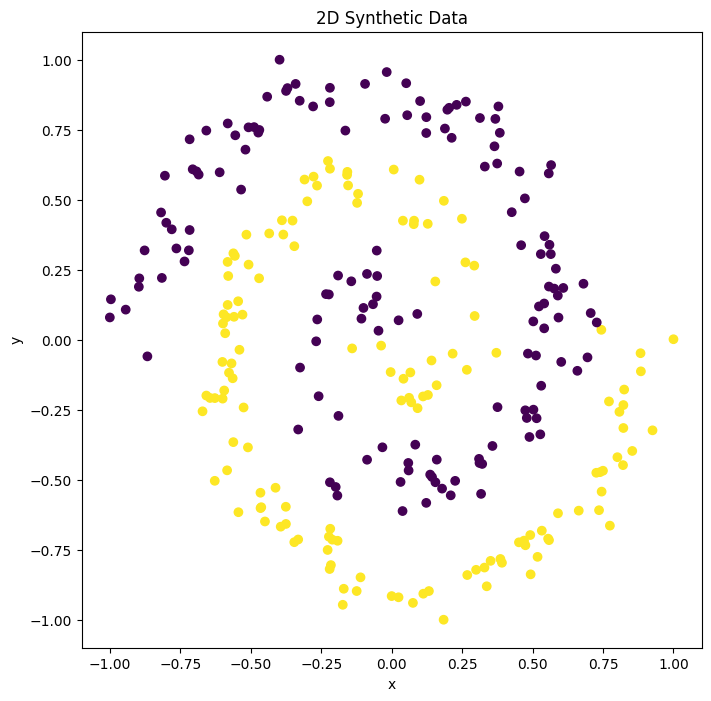

In [5]:
import matplotlib.pyplot as plt
# Create a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis')
# plt.scatter(val_data[:,0], val_data[:,1], c=val_labels, cmap='viridis')

# Set the title and labels
plt.title('2D Synthetic Data')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [6]:
import torch

# Convert the numpy arrays to PyTorch tensors
data_torch = torch.tensor(data, dtype=torch.float32)
labels_torch = torch.tensor(labels, dtype=torch.float32)
data_length = len(data_torch)
split_length = int(0.7*data_length)

train_data = data_torch[:split_length]
train_labels = labels_torch[:split_length]
val_data = data_torch[split_length:]
val_labels = labels_torch[split_length:]

print(train_data.shape, train_labels.shape)

torch.Size([196, 2]) torch.Size([196, 1])


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

g = torch.Generator().manual_seed(42)
g.manual_seed(42)
torch.manual_seed(42)

class DNet(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)

dnet = DNet(input_size=2,hidden_size=16,output_size=1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(dnet.parameters(), lr=0.01)

t_losses = []
val_losses = []

for steps in range(50000):
    dnet.train()

    output = dnet(train_data)
    train_loss = loss_fn(output, train_labels)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if steps % 10 == 0:
        dnet.eval()
        output = dnet(val_data)
        val_loss = loss_fn(output, val_labels)
        output = dnet(train_data)
        t_loss = loss_fn(output,train_labels)
        t_losses.append(t_loss.item())
        val_losses.append(val_loss.item())
        print(f"{steps} val_loss: {val_loss.item()}, train_loss: {t_loss.item()}")

0 val_loss: 0.6986224055290222, train_loss: 0.6956242322921753
10 val_loss: 0.6983293294906616, train_loss: 0.6954178214073181
20 val_loss: 0.6980583667755127, train_loss: 0.6952297687530518
30 val_loss: 0.6977936625480652, train_loss: 0.695051908493042
40 val_loss: 0.6975544691085815, train_loss: 0.6948878169059753
50 val_loss: 0.6973187327384949, train_loss: 0.6947313547134399
60 val_loss: 0.6971179842948914, train_loss: 0.6945965886116028
70 val_loss: 0.6969249248504639, train_loss: 0.694471538066864
80 val_loss: 0.6967272758483887, train_loss: 0.694343626499176
90 val_loss: 0.6965352296829224, train_loss: 0.694225013256073
100 val_loss: 0.6963778734207153, train_loss: 0.6941238641738892
110 val_loss: 0.6961909532546997, train_loss: 0.6940051317214966
120 val_loss: 0.6960338354110718, train_loss: 0.6939107179641724
130 val_loss: 0.6958953142166138, train_loss: 0.6938242316246033
140 val_loss: 0.6957404017448425, train_loss: 0.6937288045883179
150 val_loss: 0.6956164240837097, train_

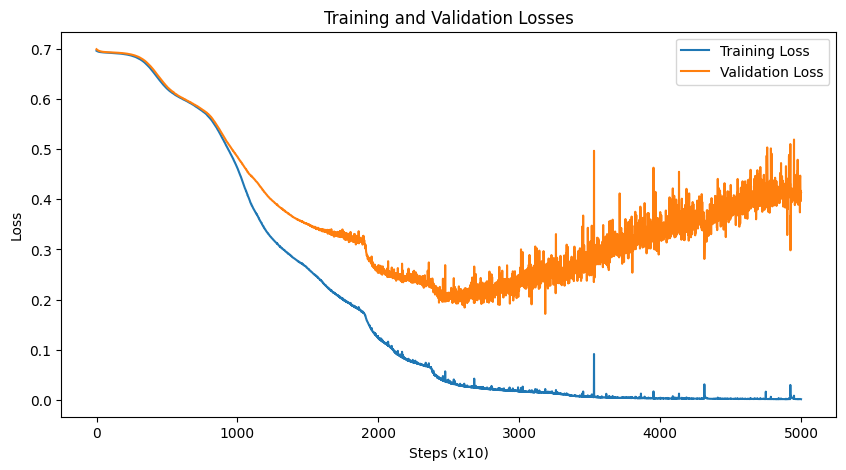

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(t_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Steps (x10)')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

g = torch.Generator().manual_seed(42)
g.manual_seed(42)
torch.manual_seed(42)

class DNet(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)


dnet = DNet(input_size=2,hidden_size=16,output_size=1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(dnet.parameters(), lr=0.01)

t_losses = []
val_losses = []

min_val_loss : float = float('inf')
patience : int = 100  # Number of epochs to wait for improvement before stopping
steps_no_improve : int= 0
min_step : int = 0

for steps in range(50000):
    dnet.train()

    output = dnet(train_data)
    train_loss = loss_fn(output, train_labels)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if steps % 10 == 0:
        dnet.eval()
        output = dnet(val_data)
        val_loss = loss_fn(output, val_labels)
        output = dnet(train_data)
        t_loss = loss_fn(output,train_labels)

        if val_loss < min_val_loss:
            min_val_loss = val_loss
            steps_no_improve = 0
            min_step = steps
            #save model here
        else:
            steps_no_improve += 1
            if steps_no_improve == patience:
                print(f'Early stopping! min step : {min_step}')
                break  # Early stop


        t_losses.append(t_loss.item())
        val_losses.append(val_loss.item())
        print(f"{steps} val_loss: {val_loss.item()}, train_loss: {t_loss.item()}")

0 val_loss: 0.6986224055290222, train_loss: 0.6956242322921753
10 val_loss: 0.6983293294906616, train_loss: 0.6954178214073181
20 val_loss: 0.6980583667755127, train_loss: 0.6952297687530518
30 val_loss: 0.6977936625480652, train_loss: 0.695051908493042
40 val_loss: 0.6975544691085815, train_loss: 0.6948878169059753
50 val_loss: 0.6973187327384949, train_loss: 0.6947313547134399
60 val_loss: 0.6971179842948914, train_loss: 0.6945965886116028
70 val_loss: 0.6969249248504639, train_loss: 0.694471538066864
80 val_loss: 0.6967272758483887, train_loss: 0.694343626499176
90 val_loss: 0.6965352296829224, train_loss: 0.694225013256073
100 val_loss: 0.6963778734207153, train_loss: 0.6941238641738892
110 val_loss: 0.6961909532546997, train_loss: 0.6940051317214966
120 val_loss: 0.6960338354110718, train_loss: 0.6939107179641724
130 val_loss: 0.6958953142166138, train_loss: 0.6938242316246033
140 val_loss: 0.6957404017448425, train_loss: 0.6937288045883179
150 val_loss: 0.6956164240837097, train_

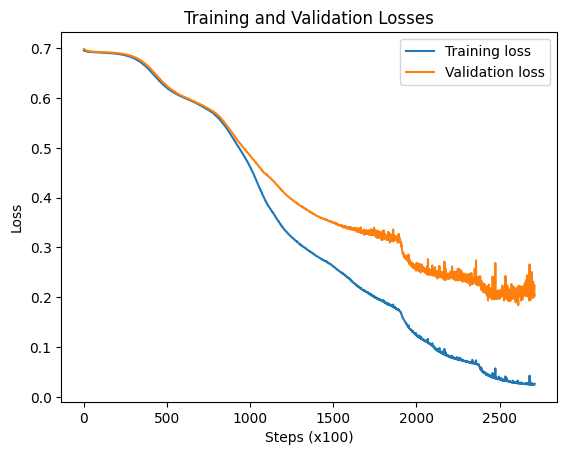

In [11]:
import matplotlib.pyplot as plt

# Assumes `t_losses` and `val_losses` are lists of loss values
plt.plot(t_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation Losses')
plt.xlabel('Steps (x100)')
plt.ylabel('Loss')
plt.legend()
plt.show()